# NYC 311 Data 에서 Air Quality 를 Query 한 데이터입니다.

- 그런데 api키를 입력안해가지고 1000개 밖에 출력이 안되었습니다.
- NYC OPENDATA 가입하시고 api 키 발급받으셔서 .json 뒤에 입력하시면 되겠습니다.

- google map api, sk api랑 동일해서 다들 아실 거라고 생각해요.

In [2]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
import geopandas as gpd
import mplleaflet

import matplotlib.pyplot as plt

#### Query는 그냥 일반 기존 api 사용법이랑 비슷하구요.
#### Spatial Query도 가능합니다.
  - [좌상 ~ 우하] 로 설정하거나,
  - [lat,lon, buffer size] 로 버퍼로 Query도 가능합니다.

#### 그리고 데이터 타입은
  - csv
  - geojson
  - json

#### 으로 제공하고 있어서 geo_json 으로 하시면 사용하실때 훨씬 수월하실겁니다.

In [3]:
#url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.geojson?complaint_type=Air%20Quality"
#원래 리눅스 환경이면 !wget = url 하면 받아지는데 윈도우로 해서 그냥 다운로드 하고 데이터를 read 했습니다.

############# 관련 API DOCUMENTATION ##################
# https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv

df = gpd.read_file('../test.geojson')
df.head()

,location_state,facility_type,intersection_street_2,city,location_zip,park_borough,latitude,road_ramp,created_date,agency,...,resolution_description,community_board,resolution_action_updated_date,intersection_street_1,closed_date,vehicle_type,cross_street_1,borough,landmark,geometry
0,None,N/A,None,BROOKLYN,None,BROOKLYN,40.631429870712815,None,2018-10-02T15:51:00,DEP,...,The Department of Environmental Protection has...,10 BROOKLYN,2018-10-03T08:48:00,None,None,None,5 AVE,BROOKLYN,None,POINT (-74.02115172475099 40.631429870713)
1,None,N/A,None,BROOKLYN,None,BROOKLYN,40.7085237661457,None,2018-10-02T14:21:00,DEP,...,The Department of Environmental Protection did...,01 BROOKLYN,2018-10-03T14:00:00,None,2018-10-03T14:00:00,None,S 5 ST,BROOKLYN,None,POINT (-73.954946045586 40.708523766146)
2,None,N/A,None,Ridgewood,None,QUEENS,40.71103561312886,None,2018-10-02T11:31:00,DEP,...,The Department of Environmental Protection has...,05 QUEENS,2018-10-03T08:31:00,None,None,None,88 ST,QUEENS,None,POINT (-73.864461469221 40.711035613129)
3,None,N/A,None,BROOKLYN,None,BROOKLYN,40.67221648895488,None,2018-10-02T13:26:00,DEP,...,The Department of Environmental Protection has...,08 BROOKLYN,2018-10-03T08:36:00,None,None,None,ST FRANCIS PL,BROOKLYN,None,POINT (-73.95634766269499 40.672216488955)
4,None,N/A,None,NEW YORK,None,MANHATTAN,40.77896735558857,None,2018-10-02T17:42:00,DEP,...,The Department of Environmental Protection has...,08 MANHATTAN,2018-10-03T08:37:00,None,None,None,E 86 ST,MANHATTAN,None,POINT (-73.95386571455001 40.778967355589)


In [14]:
ax = df.geometry.plot()
mplleaflet.display(fig=ax.figure) # To display it right at the notebook.

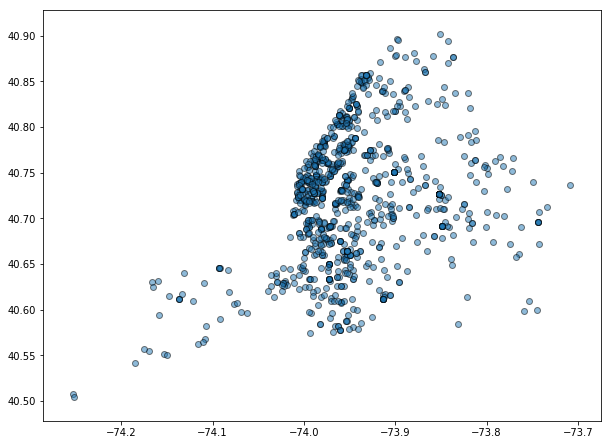

In [15]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

### 그냥 이렇게 Points 별로 있는건데요. 잠깐 둘러봐도 맨하탄에 complaints가 많은 것을 알 수 있습니다. 사는 사람이 많으니깐요 ㅎㅎ.

### 수업중에 가장 많이 언급되었던 건, open date, close date가 있어서 resolution time을 계산해서 지역별로 비교하는 내용이었습니다.